In [1]:
#1. ライブラリの読み込み 
import numpy as np
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
np.random.seed(123)

In [2]:
#2. 活性化関数
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# シグモイド関数の微分(誤差逆伝搬用)
def dsigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [3]:
#3. 単純パーセプトロン
class Layer(object):
    def __init__(self, input_dim, output_dim,
                 activation, dactivation):
        self.w = np.random.normal(size=(input_dim, output_dim))
        self.b = np.zeros(output_dim)
        self.activation = activation
        self.dactivation = dactivation

    def __call__(self, x):
        return self.forward(x)

    def forward(self, x):
        self._input = x
        self._pre_activation = np.matmul(x, self.w) + self.b
        return self.activation(self._pre_activation)

    def backward(self, delta, W):
        delta = self.dactivation(self._pre_activation) \
                * np.matmul(delta, W.T)
        return delta

    def compute_gradients(self, delta):
        dW = np.matmul(self._input.T, delta)
        db = np.matmul(np.ones(self._input.shape[0]), delta)

        return dW, db

In [4]:
#4. 多層パーセプロン
class MLP(object):
    def __init__(self, input_dim, hidden_dim, output_dim):
        self.l1 = Layer(input_dim=input_dim,
                        output_dim=hidden_dim,
                        activation=sigmoid,
                        dactivation=dsigmoid)

        self.l2 = Layer(input_dim=hidden_dim,
                        output_dim=output_dim,
                        activation=sigmoid,
                        dactivation=dsigmoid)

        self.layers = [self.l1, self.l2]

    def __call__(self, x):
        return self.forward(x)

    def forward(self, x):
        h = self.l1(x)
        y = self.l2(h)
        return y


In [5]:
#5. データの準備
N = 300
x, t = datasets.make_moons(N, noise=0.3)
t = t.reshape(N, 1)
x_train, x_test, t_train, t_test = \
        train_test_split(x, t, test_size=0.2)

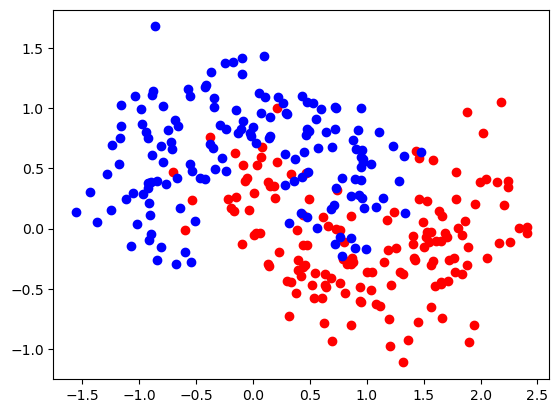

In [6]:
# 6.データの表示
x1 = []
x2 = []
for i in range(len(x)):
    if t[i] > 0.5:
        x1.append(x[i])
    else:
        x2.append(x[i])
x1 = np.array(x1)
x2 = np.array(x2)
plt.scatter(x1[:,0],x1[:,1],color="red")
plt.scatter(x2[:,0],x2[:,1],color="blue")

In [7]:
#7. モデルの構築
model = MLP(2, 3, 1)

In [8]:
#8. モデルの学習
def compute_loss(t, y):
    return (-t * np.log(y) - (1 - t) * np.log(1 - y)).sum()

def train_step(x, t):
    y = model(x)
    for i, layer in enumerate(model.layers[::-1]):
        if i == 0:
            delta = y - t
        else:
            delta = layer.backward(delta, W)
        dW, db = layer.compute_gradients(delta)
        layer.w = layer.w - 0.1 * dW
        layer.b = layer.b - 0.1 * db

        W = layer.w

    loss = compute_loss(t, y)
    return loss

In [9]:
#9. モデルの学習
epochs = 100
batch_size = 30
n_batches = x_train.shape[0] // batch_size

for epoch in range(epochs):
    train_loss = 0.
    x_, t_ = shuffle(x_train, t_train)

    for n_batch in range(n_batches):
        start = n_batch * batch_size
        end = start + batch_size

        train_loss += train_step(x_[start:end],
                                 t_[start:end])

    if epoch % 10 == 0 or epoch == epochs - 1:
        print('epoch: {}, loss: {:.3f}'.format(
            epoch+1,
            train_loss
        ))

epoch: 1, loss: 143.587
epoch: 11, loss: 100.656
epoch: 21, loss: 97.881
epoch: 31, loss: 93.624
epoch: 41, loss: 90.038
epoch: 51, loss: 94.091
epoch: 61, loss: 80.874
epoch: 71, loss: 66.254
epoch: 81, loss: 71.314
epoch: 91, loss: 61.582
epoch: 100, loss: 58.968


In [10]:
#10. モデルの評価
preds = model(x_test) > 0.5
acc = accuracy_score(t_test, preds)
print('acc.: {:.3f}'.format(acc))

acc.: 0.933


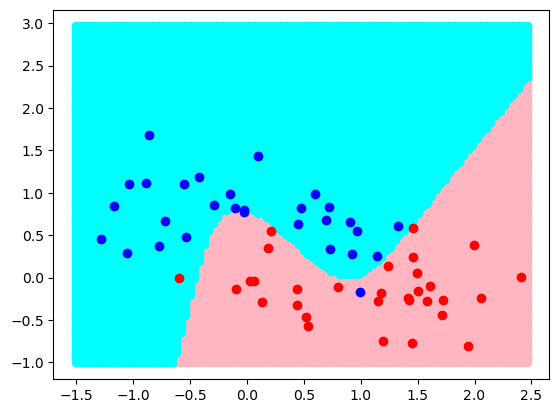

In [11]:
#11.データを表示する
d = []
for i in range(100):
    for j in range(100):
        d.append([-1.5+0.04*i,-1+0.04*j])
d = np.array(d)
preds = model(d) > 0.5
d1 = []
d2 = []
for i in range(len(d)):
    if preds[i]:
        d1.append(d[i])
    else:
        d2.append(d[i])
    
d1 = np.array(d1)
d2 = np.array(d2)

d3 = []
d4 = []
for i in range(len(x_test)):
    if t_test[i] > 0.5:
        d3.append(x_test[i])
    else:
        d4.append(x_test[i])

d3 = np.array(d3)
d4 = np.array(d4)

fig = plt.figure()
plt.scatter(d1[:,0],d1[:,1],color="lightpink")
plt.scatter(d2[:,0],d2[:,1],color="cyan")
plt.scatter(d3[:,0],d3[:,1],color="red")
plt.scatter(d4[:,0],d4[:,1],color="blue")
plt.show()